### Import Libraries

In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

### Uploading data files 

In [5]:
file1 = pd.read_excel(r"C:\Users\acer\Desktop\widsdatathon2025\TRAIN\TRAIN_CATEGORICAL_METADATA.xlsx")

In [6]:
file2 = pd.read_csv(r"C:\Users\acer\Desktop\widsdatathon2025\TRAIN\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv");

In [7]:
file3 = pd.read_excel(r"C:\Users\acer\Desktop\widsdatathon2025\TRAIN\TRAIN_QUANTITATIVE_METADATA.xlsx")

In [8]:
file4 = pd.read_excel(r"C:\Users\acer\Desktop\widsdatathon2025\TRAIN\TRAINING_SOLUTIONS.xlsx")

### Exploratory Data Analysis (EDA)

In [9]:
file1.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [10]:
file2.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [11]:
file3.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


### file4 is the solution file that has the prediction for training data set 

In [12]:
file4.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [13]:
file1.columns = file1.columns.str.strip()
file2.columns = file2.columns.str.strip()
file3.columns = file3.columns.str.strip()
file4.columns = file4.columns.str.strip()

# Merge the dataframes one by one
merged_data = pd.merge(file1, file2, on='participant_id', how='inner')
merged_data = pd.merge(merged_data, file3, on='participant_id', how='inner')
merged_data = pd.merge(merged_data, file4, on='participant_id', how='inner')

# Check the merged data
print(merged_data.head())

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                   

In [14]:
print(merged_data.tail())

     participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
1208   Atx7oub96GXS                     2019                       1   
1209   groSbUfkQngM                     2016                       1   
1210   zmxGvIrOD0bt                     2015                       1   
1211   rOmWFuJCud5G                     2018                       3   
1212   k8HhHnnu2wmt                     2018                       3   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
1208                               0.0                            0   
1209                               0.0                            0   
1210                               1.0                            2   
1211                               0.0                            8   
1212                               1.0                            2   

      MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
1208                        2                      21      

In [15]:
print(f"Shape of the dataset: {merged_data.shape}")

Shape of the dataset: (1213, 19930)


In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to Sex_F
dtypes: float64(19903), int64(26), object(1)
memory usage: 184.5+ MB


In [17]:
print(merged_data.describe())

       Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count              1213.000000             1213.000000   
mean               2017.652102                2.014839   
std                   1.122522                1.135147   
min                2015.000000                1.000000   
25%                2017.000000                1.000000   
50%                2018.000000                1.000000   
75%                2019.000000                3.000000   
max                2020.000000                4.000000   

       PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
count                       1202.000000                  1213.000000   
mean                           0.424293                     2.080791   
std                            0.687470                     3.164636   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                            0.000000      

In [18]:
duplicate_columns = merged_data.columns[merged_data.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index([], dtype='object')


<IPython.core.display.Javascript object>


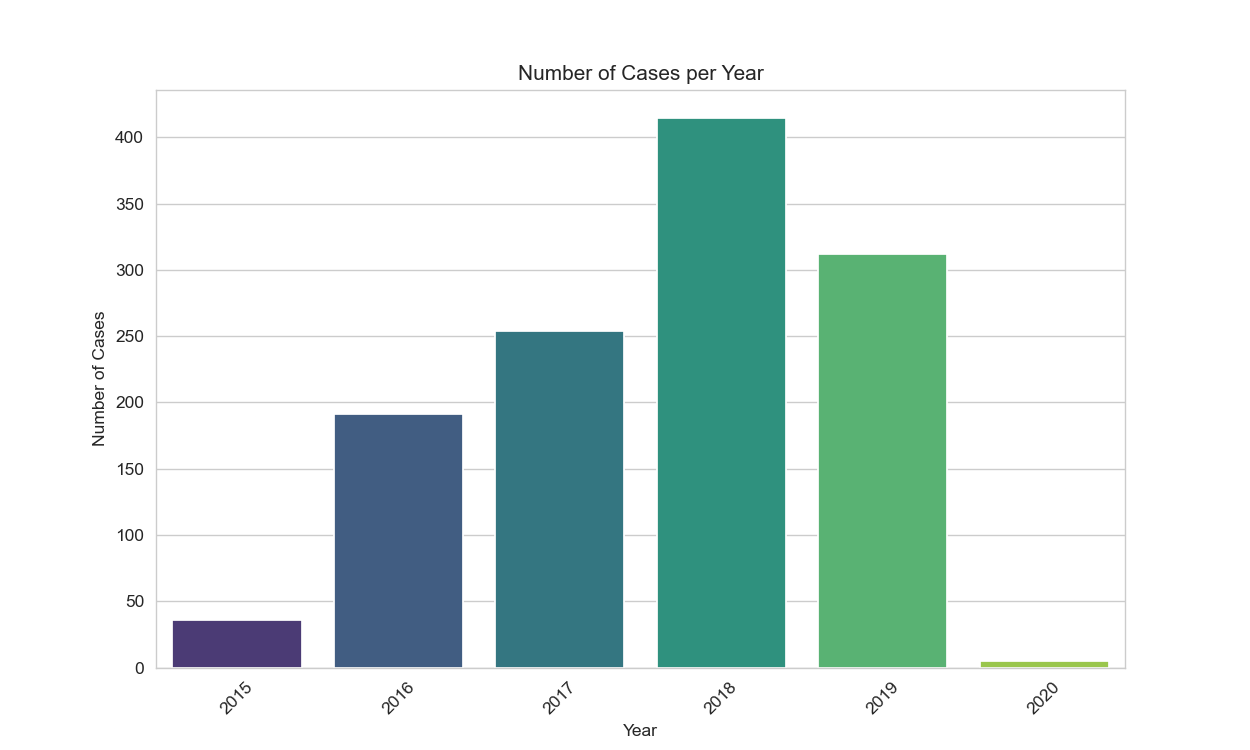

In [19]:
cases_per_year = merged_data.groupby('Basic_Demos_Enroll_Year').size()

# Plotting the number of cases per year
plt.figure(figsize=(10, 6))
sns.barplot(x=cases_per_year.index, y=cases_per_year.values, palette='viridis')

# Adding title and labels
plt.title("Number of Cases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>


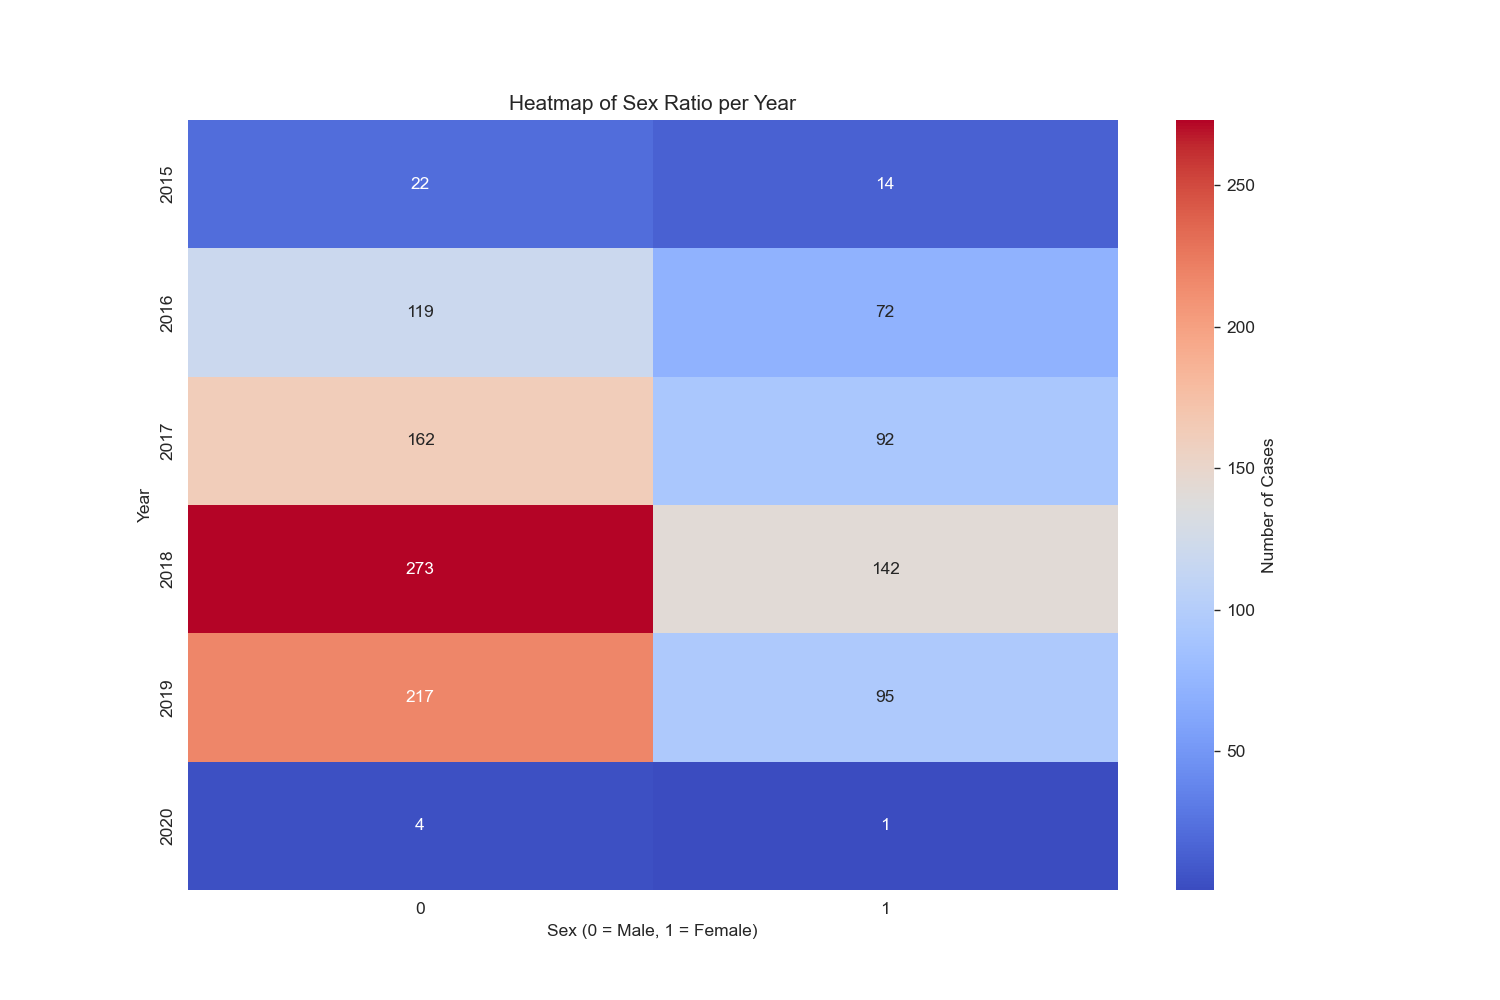

In [20]:
sex_ratio = merged_data.groupby(['Basic_Demos_Enroll_Year', 'Sex_F']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sex_ratio, cmap='coolwarm', annot=True, fmt="d", cbar_kws={'label': 'Number of Cases'})

# Adding title and labels
plt.title("Heatmap of Sex Ratio per Year")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Year")
plt.show()

In [21]:
# Ensure no missing values in the columns for plotting
train_df = merged_data.dropna(subset=['Basic_Demos_Enroll_Year', 'Sex_F'])

# Check if 'Basic_Demos_Enroll_Year' and 'Sex_F' are present
print(train_df.columns)


Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ',
       ...
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan', 'ADHD_Outcome', 'Sex_F'],
      dtype='object', length=19930)


<IPython.core.display.Javascript object>


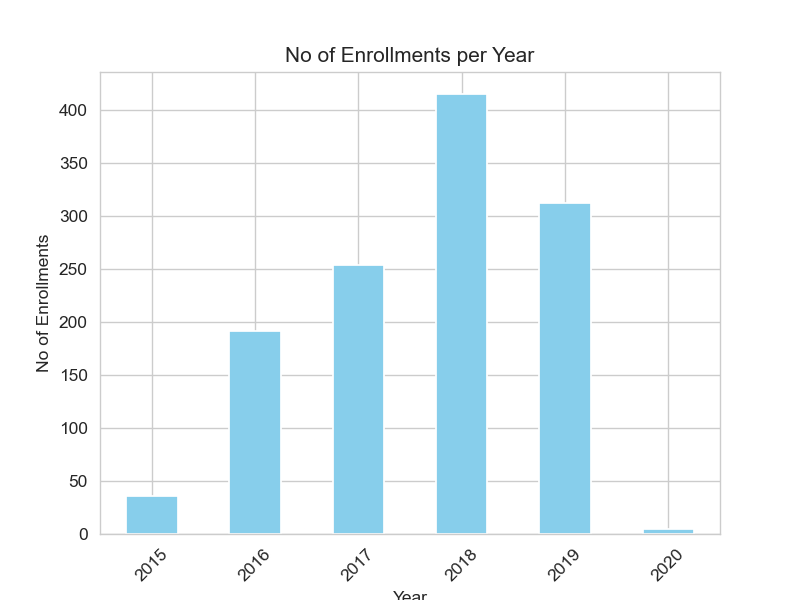

In [22]:

# Plotting the number of enrollments per year
ax1 = train_df.groupby('Basic_Demos_Enroll_Year').size().plot(kind='bar', color='skyblue')
ax1.set_title('No of Enrollments per Year')
plt.xlabel('Year')
plt.ylabel('No of Enrollments')
plt.xticks(rotation=45)
plt.show()

0    797
1    416
Name: Sex_F, dtype: int64


<IPython.core.display.Javascript object>


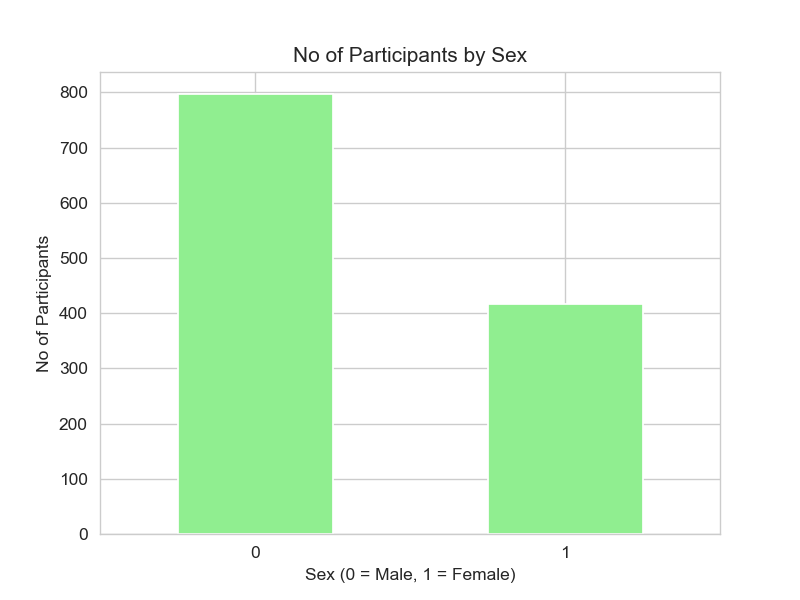

In [23]:
# Plotting the number of participants by sex
print(train_df['Sex_F'].value_counts())  # Check the distribution of 'Sex_F'
ax2 = train_df.groupby('Sex_F').size().plot(kind='bar', color='lightgreen')
ax2.set_title('No of Participants by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')  # Modify labels based on your data
plt.ylabel('No of Participants')
plt.xticks(rotation=0)
plt.show()

In [24]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 
                    'Basic_Demos_Study_Site', 'MRI_Track_Scan_Location', 
                    'Barratt_Barratt_P1_Occ']

df_categorical = merged_data[categorical_cols]
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(df_categorical)

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df = merged_data.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([merged_data, df_encoded], axis=1)

In [25]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['MRI_Track_Age_at_Scan', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [26]:
from sklearn.decomposition import PCA

fmri_cols = [col for col in df.columns if 'throw' in col]  # Select fMRI features
pca = PCA(n_components=50)  # Reduce to 50 components
fmri_pca = pca.fit_transform(df[fmri_cols])

df_fmri_pca = pd.DataFrame(fmri_pca, columns=[f'pca_{i}' for i in range(50)])
df = pd.concat([df.drop(columns=fmri_cols), df_fmri_pca], axis=1)

In [28]:
numerical_cols = df.select_dtypes(include=['number']).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

print(df.isnull().sum())

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
                                   ..
pca_45                              0
pca_46                              0
pca_47                              0
pca_48                              0
pca_49                              0
Length: 114, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y = df[['ADHD_Outcome', 'Sex_F']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
print(X_train.describe())

       Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count               970.000000              970.000000   
mean               2017.657732                2.024742   
std                   1.108354                1.140042   
min                2015.000000                1.000000   
25%                2017.000000                1.000000   
50%                2018.000000                1.000000   
75%                2019.000000                3.000000   
max                2020.000000                4.000000   

       PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
count                        970.000000                   970.000000   
mean                           0.409278                     2.093814   
std                            0.678823                     3.181873   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                            0.000000      